# Введение в искусственные нейронные сети
# Урок 7. Дектирование объектов

## Содержание методического пособия:


<ol>
<li>Что такое дектирование объектов на изображении</li>
<li>Виды архитектур для дектирования объектов на изображении</li>
<li>Практический пример сегментации</li>
</ol>

## Что такое детектирование объектов на изображении.

Дектирование объектов на изображениях, пожалуй одна из самых сложных и самых полезных задач, которую может решать компьютерное зрение. 

Сложность проистекает из того факта, что нам нужно не только опредилить какому классу пренадлежат объекты на изображении, отделить одни экзепляры классов от других, но и найти их месторасположение на изображении.

Полезность решения данного задачи связана с тем фактом, что она приближена к возможностям человеческого зрения и восприятия. Мы смотрим на окружающий мир, видем те или иные объекты и понимаем где они находяться. А понимая где они находяться мы можем понимать как они движуться. Нейронные сети решающее подобные задачи могут применяться в самом широком спектре областей - начиная от систем видеонаблюдения до полностью автоматизированных магазинов наподобие Amazon Go.

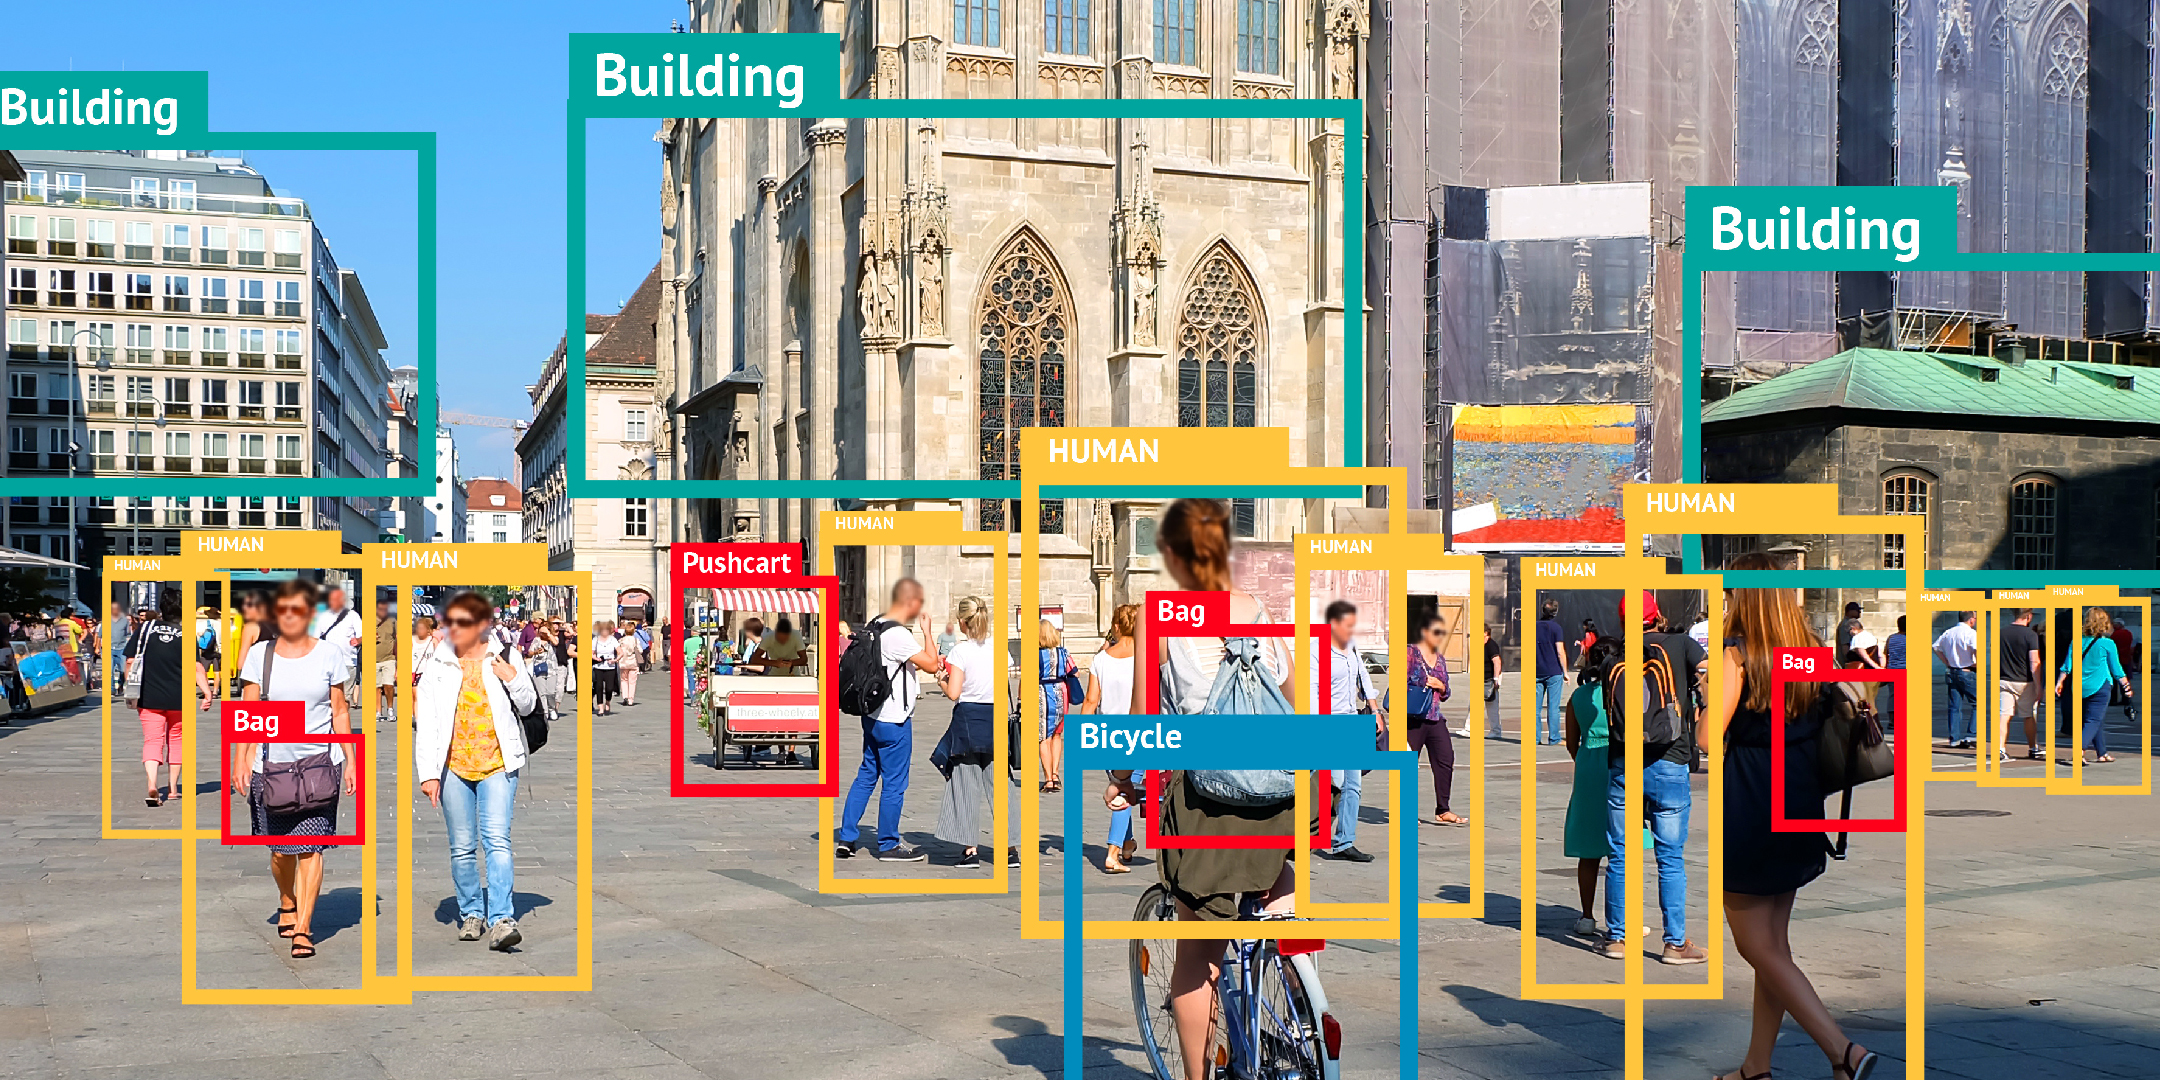

Источник изображения: https://bitmovin.com/wp-content/uploads/2019/08/Object_detection_Blog_Image_Q3_19.jpg

В силу того, что решение данной задачи существенно отличается от задачи классификации изображений, существенно отличаются и архитектуры нейронных сетей для этой задачи, которые мы разберем на данном уроке. В первую очередь мы укажем на отличия в датасетах и метриках. 

Для обучения подобных нейронных сетей нам нужно не только понимать какие классы присутсвуют на изображении, но и понимать где они находяться, поэтому в датасетах для object detection, выделяются также bounding box'ы для того, чтобы нейросеть могла корректировать свои предсказания месторасположения объектов по ходу обучения.

Известными датасетами для object detection являются следующие:
1. Pascal VOC(имеются разные версии данного датасета за разные годы)
2. MS COCO(также есть разные версии данного датасета за разные годы)
3. ImageNet(в ImageNet есть разметка не только для классификации, но и для других задач)


Также стоит отметить, что если в случае с задачей классификации, нам было возможно оценить работу нейронной сети, просто определив верный или не верный класс был предсказан, то в случае с object detection нам нужно определить помимо классов насколько точно определено его местоположение на изображении.

Популярной метрикой для решения этой задачи является - mAP (mean Average Precision). Она учитывает насколько совпал bounding box предсказонной нейронной сетью с действительностью,

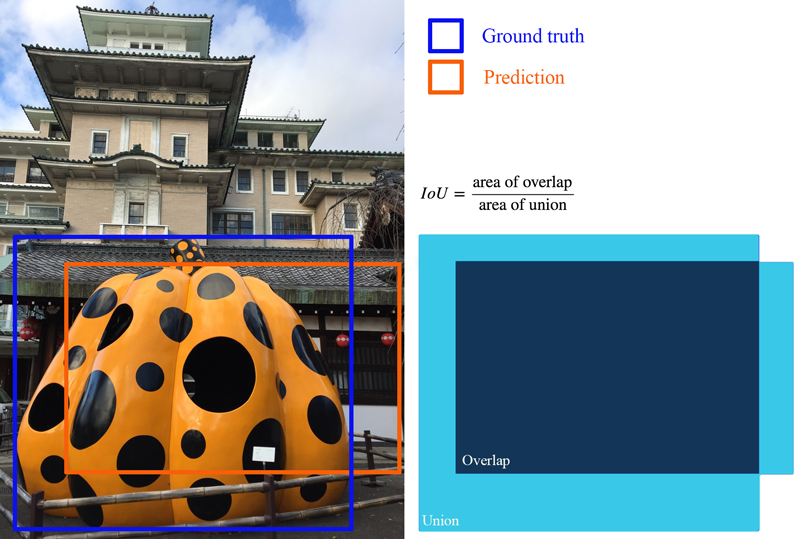
Источник изображения: https://miro.medium.com/max/800/1*FrmKLxCtkokDC3Yr1wc70w.png


а также засчет дополнительной комбинации формул понимает как много объектов правильно найдены на изображении и для сколь многих из них предсказан верный класс.


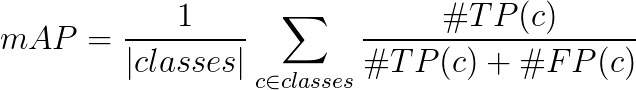
Источник изображения: https://i.stack.imgur.com/NSaRb.gif

Теперь давайте перейдем к архитектурам.

## Виды архитектур для дектирования объектов на изображении.


Начиная с 2012 г., когда широкие круги специалистов в области компьютерного зрения стали использовать нейронные сети, для тех задач которые прежде решали классические алгоритмы комп. зрения, появилось и продолжает появляться множество архитектур предназначенных для object detection. Мы осветим несколько архитектур, которые стали важными вехами с одной стороны, а с другой стороны их модификации являются на данный момент лучшими способами для решения задачи object detection.

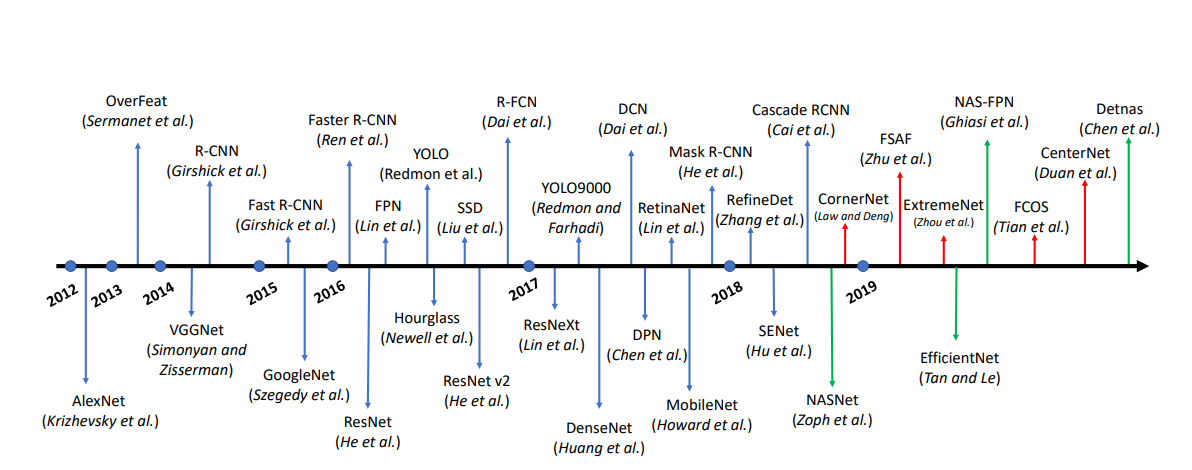
Источник изображения: Recent Advances in Deep Learning for Object Detection. Xiongwei Wu, Doyen Sahoo, Steven C.H. Hoi 2019

# R-CNN #

R-CNN - это одна из первых архитектур для решения задачи object detection на основе сверточных нейронных сетей.
Данная архитектура состоит из трех частей:

1. Классический алгоритм комп. зрения, который находит области изображения на которых потенциально могут содержаться объекты

2. Сверточная нейронная сеть, которая запускается по отдельности в каждом найденном регионе и выдает набор feateres.

3. SVM алгоритм который обучается на этих features определять те или иные классы.

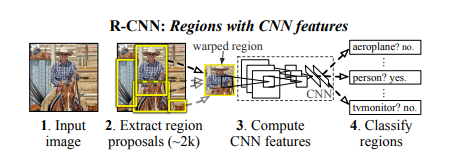
Источник изображения: https://arxiv.org/pdf/1311.2524.pdf

Данная нейросеть работала медленно. Это происходило из-за того, что приходилось многократно запускать сверточную часть на множесте областей изображения. На одно изображение уходили десятки секунд. Также данная архитектура не могла обучаться целиком, а обучалась по отдельности. Кроме того обучалась данная нейросеть тоже медленно. 

# Fast R-CNN

Данная архитектура появилась в 2015 г. и была призвана решить упомянутые выше проблемы R-CNN. Fast R-CNN состоял уже из следующих компонентов:

1. Сверточная нейронная сеть которая запускается один раз на всем изображении.

2. ROI - компонент который позволяет искать области где могут находиться объекты не на первоначальных пикслелях изображения, а на карте признаков, которую выдает сверточная часть данной архитектуры.

3. Полносвязный слой, который делает непосредственно предсказание



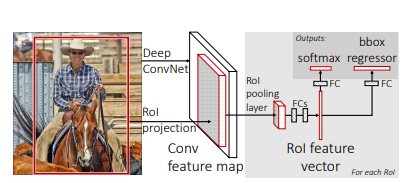
Источник изображения: https://arxiv.org/pdf/1504.08083.pdf

Данная архитектура ускорила и обучение и скорость работы изначально архитектуры R-CNN существенно. Теперь одно изображение обрабатывалось нейронной сетью за 2 секунды. Однако это по-прежнему было далеко от real-time.

# Faster R-CNN #

Данная архитектура появилась в 2016 году и является как одной из самых точных на сегодняшний день, так и относительно быстрой, время обработки ею изображения занимает меньше секунды.

Она состоит из следующих компонентов:
1. Сверточная нейронная сеть
2. Нейронная сеть корректирующая работу ROI, выбирающего регионы в карте features получающейся в ходе работы сверточной части.
3. Полносвязные слои осуществляющие предсказание.

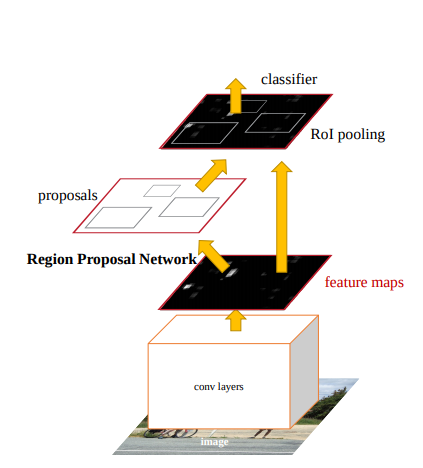
Источник изображения: https://arxiv.org/pdf/1506.01497.pdf

Данная архитектура позволяла окончательно позволили обучать нейроннуют сеть для object detection end-to-end, т.е. нейронная сеть училась и определять классы объектов и корректировать предсказания местоположения объектов(bounding box'ы)

# YOLO (You Only Look Once) #

Несмотря на то, что Faster R-CNN работала относительно быстро и с высокой точностью, она все таки была тяжеловестна и недостаточно быстра для многих задач. Все вышеприведенные архитектуры относиться к двухстадийным архитектурам, т.е. мы отдельно находим объекты и отдельно их классифицируем.

Архитектура YOLO, появившаяся в 2016 г. является первой популярной одностадийной архитектурой. 





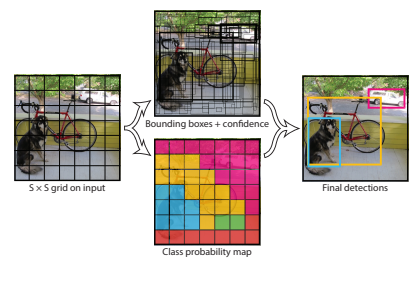
Источник изображения: https://arxiv.org/pdf/1506.02640.pdf

Данная нейронная сеть разбивает все изображение на фиксированное количество квадратов. Затем за один проход она пытается предсказать в разных комбинациях этих квадратов те или иные классы. Таким образом данная нейронная сеть несколько теряет в точности, но существенно приобретает в скорости работы.

# SSD (Single Shot MultiBox Detector) #

Данная архитектура появилась в 2016 г. и различные ее модификации являются одними из самыми применяемых на практике.

Она также как и YOLO является одностадийным дектором, также как и YOLO пытается на лету определить boundig box'ы и классы, но считывание ее результатов происходит на разных масштабах в конце нейронной сети, подобному так как это происходит в архитектуре FPN.

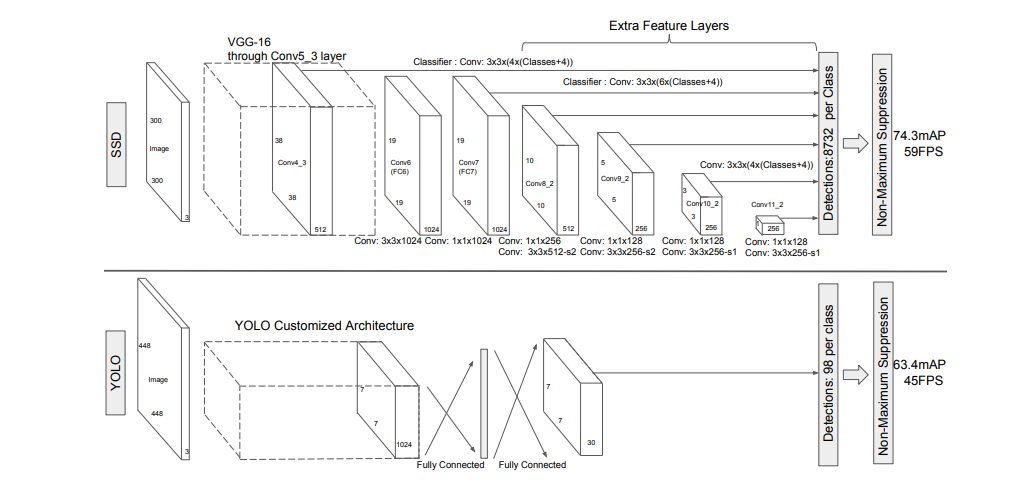
Источник изображения: https://arxiv.org/pdf/1512.02325.pdf

### Mask R-CNN

Mask R-CNN позволяет решить задачу instance segmentation, которую мы рассматривали на предыдущем уроке. Данная нейросеть сначала посредством Fast R-CNN находит нужны объекты на изображении, а затем посредством сегментации накладывает на них маску.

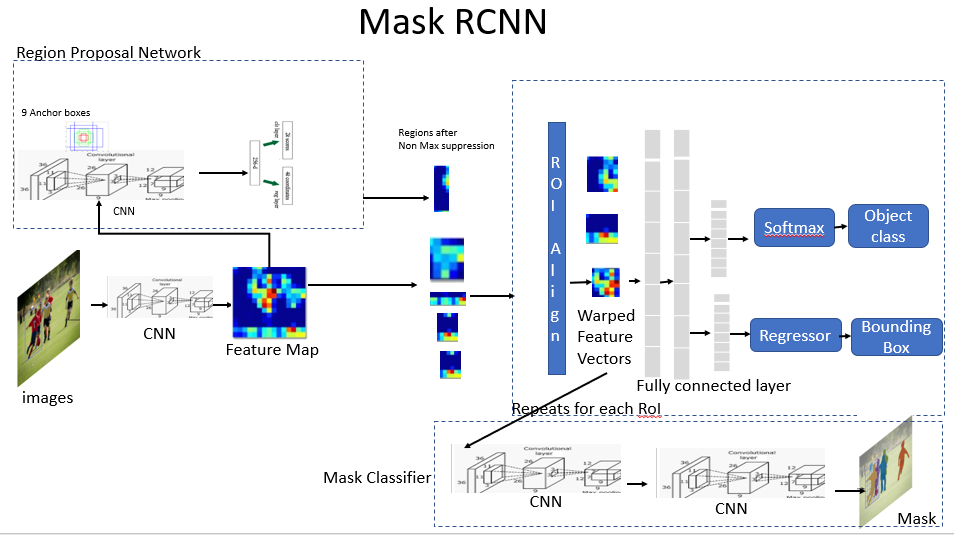

Источник изображения: https://miro.medium.com/max/1908/1*ui1roGvi_F77TY07PdaI8w.png

В целом, архитектуру для решения задачи object detection нужно подбирать исходя из нужного вам сочетания точности распознования и скорости работы нейронной сети. 

Данная диаграмма показывая различные архитектуры с различными вариантами сверточной части для них, дает общее представление в этом вопросе - 

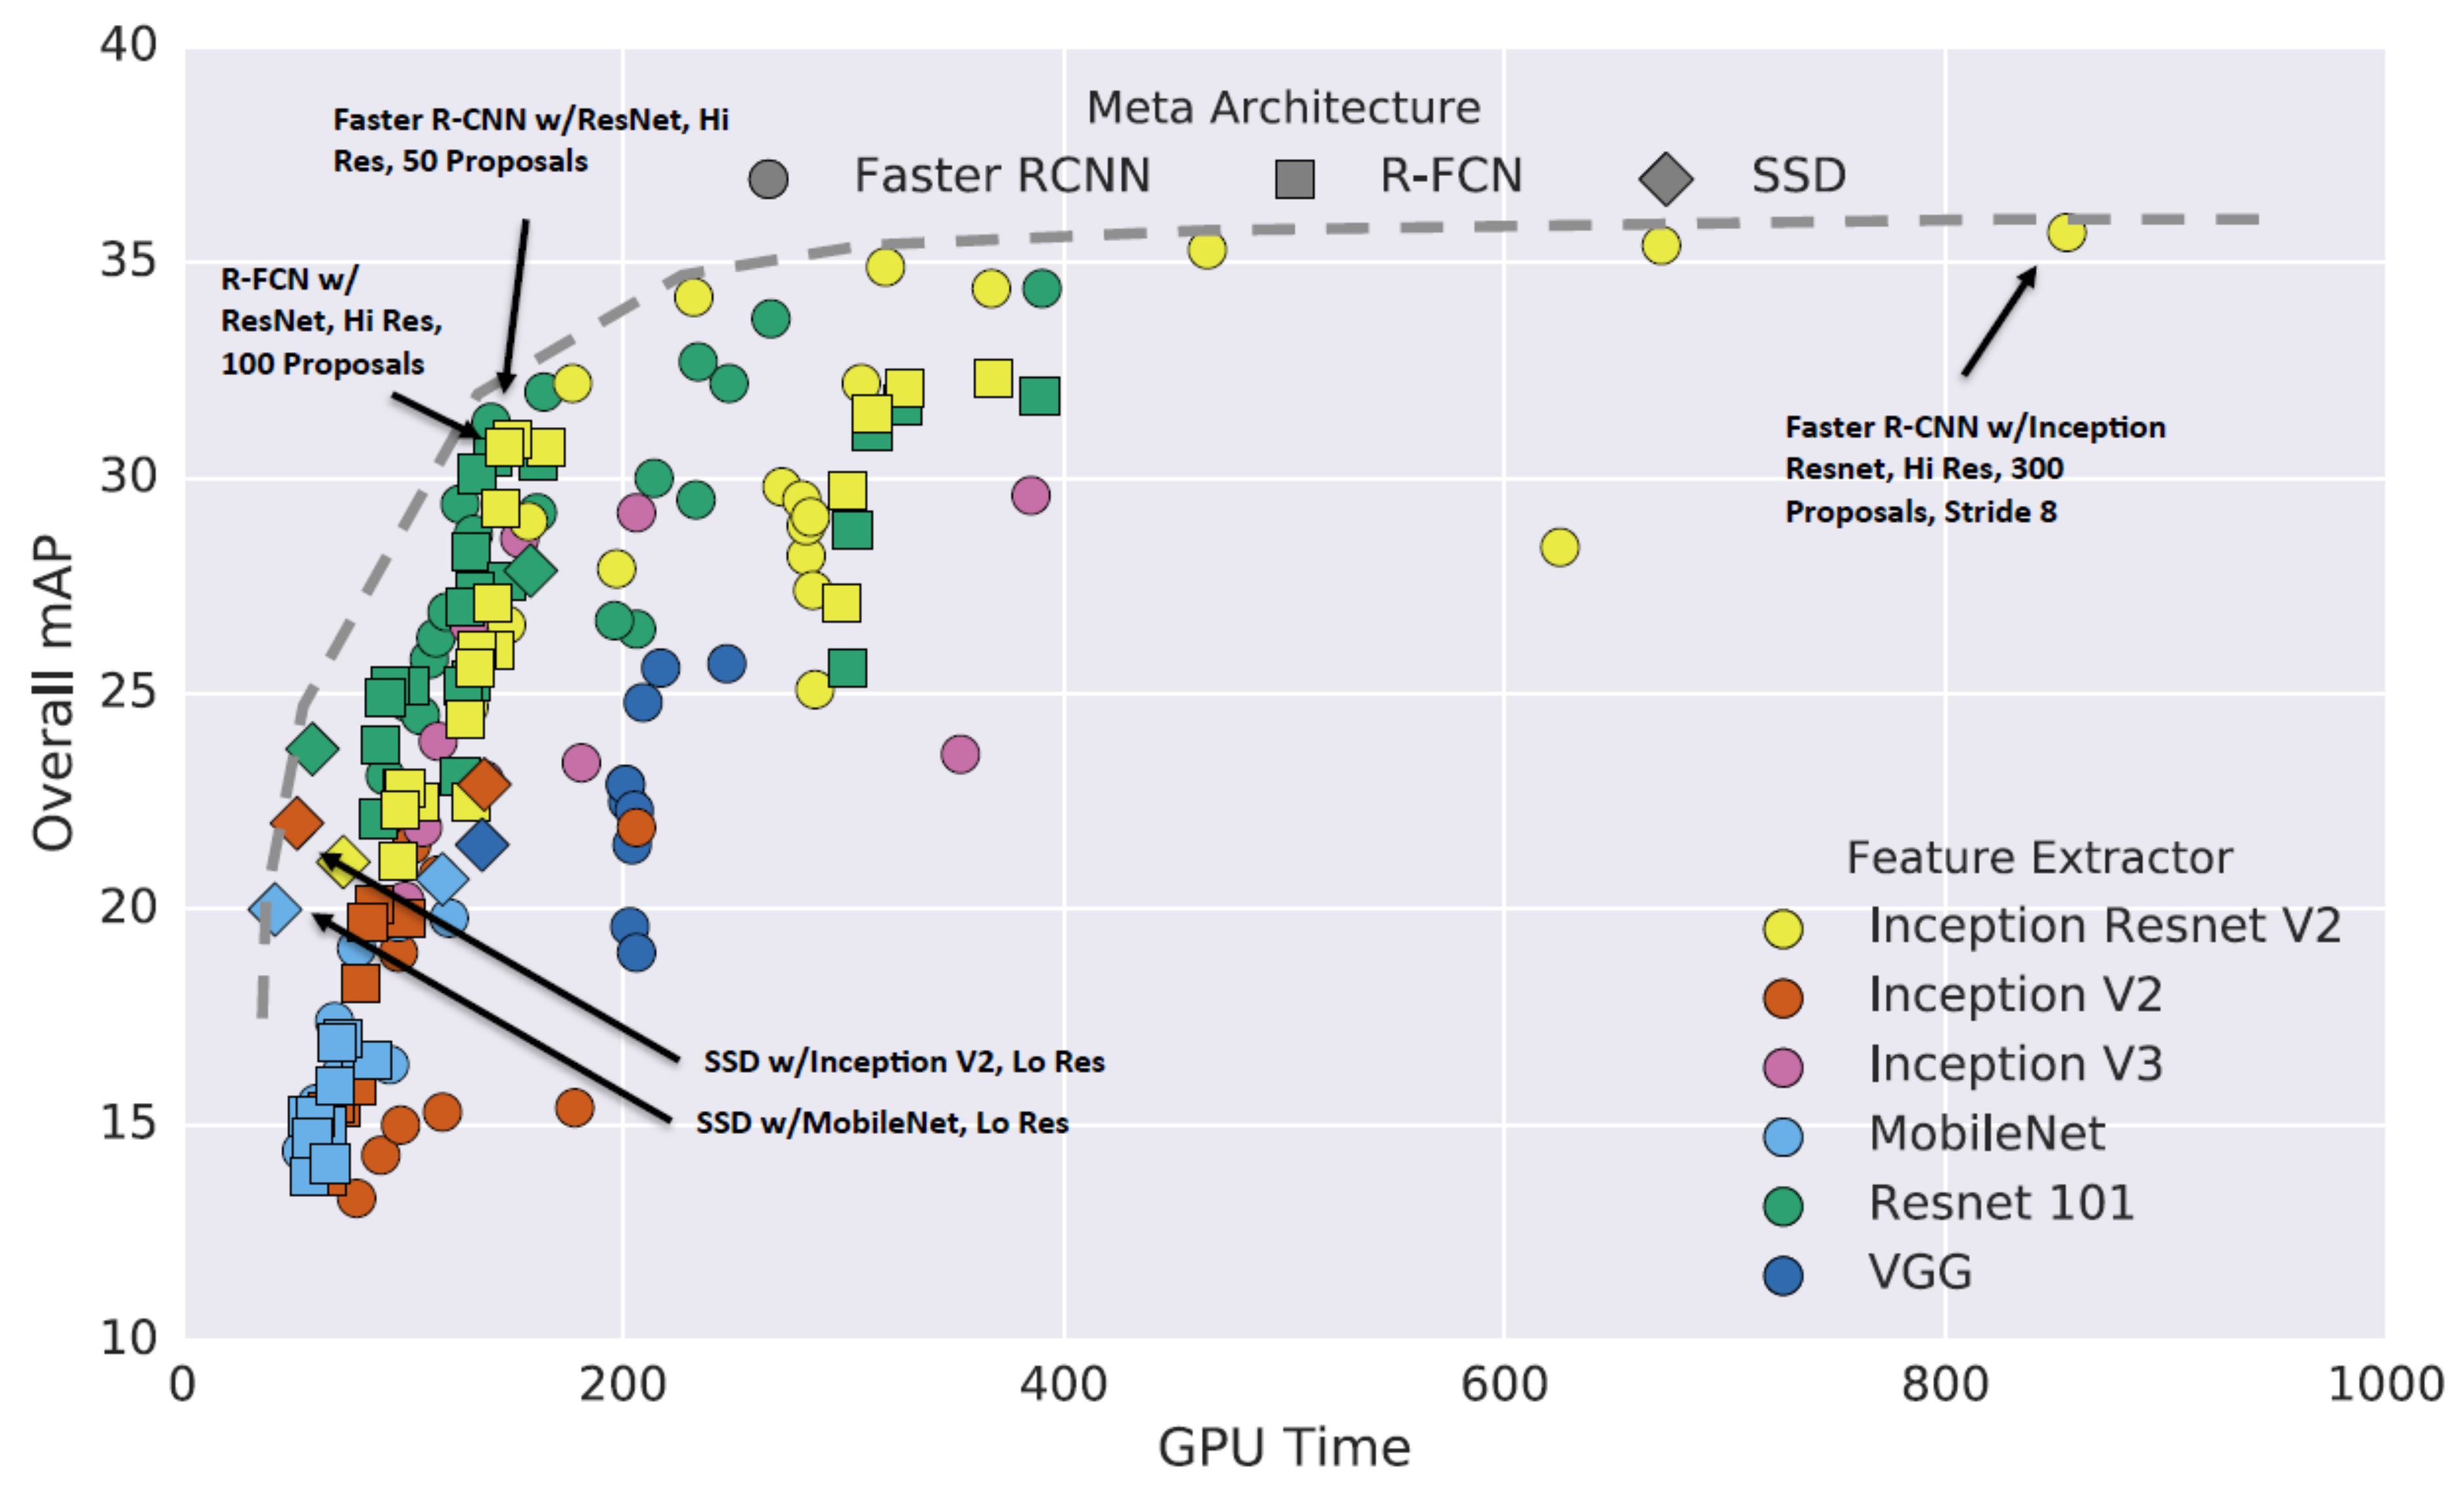
Источник изображения: https://cdn-images-1.medium.com/fit/t/3750/2265/1*xgBs8CZdf1AvaFz92ERB6A.png

## Практический пример 

Обучение нейронных сетей для object detection требует работы над большими датасетами и громоздкой архитектуры. Мы приведем пример того, как может быть определена нейросеть SSD на tensorflow 1.15. Полный код для обучения данной нейронной сети можно найти в данном репозитории - https://github.com/sergeyveneckiy/ssd-tensorflow.

In [4]:
#-------------------------------------------------------------------------------
# Author: Lukasz Janyst <lukasz@jany.st>
# Date:   27.08.2017
#-------------------------------------------------------------------------------
# This file is part of SSD-TensorFlow.
#
# SSD-TensorFlow is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# SSD-TensorFlow is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with SSD-Tensorflow.  If not, see <http://www.gnu.org/licenses/>.
#-------------------------------------------------------------------------------

import zipfile
import shutil
import os

import tensorflow as tf
import numpy as np

from urllib.request import urlretrieve
from tqdm import tqdm

#-------------------------------------------------------------------------------
class DLProgress(tqdm):
    last_block = 0

    #---------------------------------------------------------------------------
    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

#-------------------------------------------------------------------------------
def conv_map(x, size, shape, stride, name, padding='SAME'):
    with tf.variable_scope(name):
        w = tf.get_variable("filter",
                            shape=[shape, shape, x.get_shape()[3], size],
                            initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(size), name='biases')
        x = tf.nn.conv2d(x, w, strides=[1, stride, stride, 1], padding=padding)
        x = tf.nn.bias_add(x, b)
        x = tf.nn.relu(x)
        l2 = tf.nn.l2_loss(w)
    return x, l2

#-------------------------------------------------------------------------------
def classifier(x, size, mapsize, name):
    with tf.variable_scope(name):
        w = tf.get_variable("filter",
                            shape=[3, 3, x.get_shape()[3], size],
                            initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(size), name='biases')
        x = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME')
        x = tf.nn.bias_add(x, b)
        x = tf.reshape(x, [-1, mapsize.w*mapsize.h, size])
        l2 = tf.nn.l2_loss(w)
    return x, l2

#-------------------------------------------------------------------------------
def smooth_l1_loss(x):
    square_loss   = 0.5*x**2
    absolute_loss = tf.abs(x)
    return tf.where(tf.less(absolute_loss, 1.), square_loss, absolute_loss-0.5)

#-------------------------------------------------------------------------------
def array2tensor(x, name):
    init = tf.constant_initializer(value=x, dtype=tf.float32)
    tensor = tf.get_variable(name=name, initializer=init, shape=x.shape)
    return tensor

#-------------------------------------------------------------------------------
def l2_normalization(x, initial_scale, channels, name):
    with tf.variable_scope(name):
        scale = array2tensor(initial_scale*np.ones(channels), 'scale')
        x = scale*tf.nn.l2_normalize(x, axis=-1)
    return x

#-------------------------------------------------------------------------------
class SSDVGG:
    #---------------------------------------------------------------------------
    def __init__(self, session, preset):
        self.preset = preset
        self.session = session
        self.__built = False
        self.__build_names()

    #---------------------------------------------------------------------------
    def build_from_vgg(self, vgg_dir, num_classes, a_trous=True,
                       progress_hook='tqdm'):
        """
        Build the model for training based on a pre-define vgg16 model.
        :param vgg_dir:       directory where the vgg model should be stored
        :param num_classes:   number of classes
        :param progress_hook: a hook to show download progress of vgg16;
                              the value may be a callable for urlretrieve
                              or string "tqdm"
        """
        self.num_classes = num_classes+1
        self.num_vars = num_classes+5
        self.l2_loss = 0
        self.__download_vgg(vgg_dir, progress_hook)
        self.__load_vgg(vgg_dir)
        if a_trous: self.__build_vgg_mods_a_trous()
        else: self.__build_vgg_mods()
        self.__build_ssd_layers()
        self.__build_norms()
        self.__select_feature_maps()
        self.__build_classifiers()
        self.__built = True

    #---------------------------------------------------------------------------
    def build_from_metagraph(self, metagraph_file, checkpoint_file):
        """
        Build the model for inference from a metagraph shapshot and weights
        checkpoint.
        """
        sess = self.session
        saver = tf.train.import_meta_graph(metagraph_file)
        saver.restore(sess, checkpoint_file)
        self.image_input = sess.graph.get_tensor_by_name('image_input:0')
        self.keep_prob   = sess.graph.get_tensor_by_name('keep_prob:0')
        self.result      = sess.graph.get_tensor_by_name('result/result:0')

    #---------------------------------------------------------------------------
    def build_optimizer_from_metagraph(self):
        """
        Get the optimizer and the loss from metagraph
        """
        sess = self.session
        self.loss = sess.graph.get_tensor_by_name('total_loss/loss:0')
        self.localization_loss = sess.graph.get_tensor_by_name('localization_loss/localization_loss:0')
        self.confidence_loss = sess.graph.get_tensor_by_name('confidence_loss/confidence_loss:0')
        self.l2_loss = sess.graph.get_tensor_by_name('total_loss/l2_loss:0')
        self.optimizer = sess.graph.get_operation_by_name('optimizer/optimizer')
        self.labels = sess.graph.get_tensor_by_name('labels:0')

        self.losses = {
            'total': self.loss,
            'localization': self.localization_loss,
            'confidence': self.confidence_loss,
            'l2': self.l2_loss
        }

    #---------------------------------------------------------------------------
    def __download_vgg(self, vgg_dir, progress_hook):
        #-----------------------------------------------------------------------
        # Check if the model needs to be downloaded
        #-----------------------------------------------------------------------
        vgg_archive = 'vgg.zip'
        vgg_files   = [
            vgg_dir + '/variables/variables.data-00000-of-00001',
            vgg_dir + '/variables/variables.index',
            vgg_dir + '/saved_model.pb']

        missing_vgg_files = [vgg_file for vgg_file in vgg_files \
                             if not os.path.exists(vgg_file)]

        if missing_vgg_files:
            if os.path.exists(vgg_dir):
                shutil.rmtree(vgg_dir)
            os.makedirs(vgg_dir)

            #-------------------------------------------------------------------
            # Download vgg
            #-------------------------------------------------------------------
            url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/vgg.zip'
            if not os.path.exists(vgg_archive):
                if callable(progress_hook):
                    urlretrieve(url, vgg_archive, progress_hook)
                else:
                    with DLProgress(unit='B', unit_scale=True, miniters=1) as pbar:
                        urlretrieve(url, vgg_archive, pbar.hook)

            #-------------------------------------------------------------------
            # Extract vgg
            #-------------------------------------------------------------------
            zip_archive = zipfile.ZipFile(vgg_archive, 'r')
            zip_archive.extractall(vgg_dir)
            zip_archive.close()

    #---------------------------------------------------------------------------
    def __load_vgg(self, vgg_dir):
        sess = self.session
        graph = tf.saved_model.loader.load(sess, ['vgg16'], vgg_dir+'/vgg')
        self.image_input = sess.graph.get_tensor_by_name('image_input:0')
        self.keep_prob   = sess.graph.get_tensor_by_name('keep_prob:0')
        self.vgg_conv4_3 = sess.graph.get_tensor_by_name('conv4_3/Relu:0')
        self.vgg_conv5_3 = sess.graph.get_tensor_by_name('conv5_3/Relu:0')
        self.vgg_fc6_w   = sess.graph.get_tensor_by_name('fc6/weights:0')
        self.vgg_fc6_b   = sess.graph.get_tensor_by_name('fc6/biases:0')
        self.vgg_fc7_w   = sess.graph.get_tensor_by_name('fc7/weights:0')
        self.vgg_fc7_b   = sess.graph.get_tensor_by_name('fc7/biases:0')

        layers = ['conv1_1', 'conv1_2', 'conv2_1', 'conv2_2', 'conv3_1',
                  'conv3_2', 'conv3_3', 'conv4_1', 'conv4_2', 'conv4_3',
                  'conv5_1', 'conv5_2', 'conv5_3']

        for l in layers:
            self.l2_loss += sess.graph.get_tensor_by_name(l+'/L2Loss:0')

    #---------------------------------------------------------------------------
    def __build_vgg_mods(self):
        self.mod_pool5 = tf.nn.max_pool(self.vgg_conv5_3, ksize=[1, 3, 3, 1],
                                        strides=[1, 1, 1, 1], padding='SAME',
                                        name='mod_pool5')

        with tf.variable_scope('mod_conv6'):
            x = tf.nn.conv2d(self.mod_pool5, self.vgg_fc6_w,
                             strides=[1, 1, 1, 1], padding='SAME')
            x = tf.nn.bias_add(x, self.vgg_fc6_b)
            self.mod_conv6 = tf.nn.relu(x)
            self.l2_loss += tf.nn.l2_loss(self.vgg_fc6_w)

        with tf.variable_scope('mod_conv7'):
            x = tf.nn.conv2d(self.mod_conv6, self.vgg_fc7_w,
                             strides=[1, 1, 1, 1], padding='SAME')
            x = tf.nn.bias_add(x, self.vgg_fc7_b)
            x = tf.nn.relu(x)
            self.mod_conv7 = x
            self.l2_loss += tf.nn.l2_loss(self.vgg_fc7_w)

    #---------------------------------------------------------------------------
    def __build_vgg_mods_a_trous(self):
        sess = self.session

        self.mod_pool5 = tf.nn.max_pool(self.vgg_conv5_3, ksize=[1, 3, 3, 1],
                                        strides=[1, 1, 1, 1], padding='SAME',
                                        name='mod_pool5')

        #-----------------------------------------------------------------------
        # Modified conv6
        #-----------------------------------------------------------------------
        with tf.variable_scope('mod_conv6'):
            #-------------------------------------------------------------------
            # Decimate the weights
            #-------------------------------------------------------------------
            orig_w, orig_b = sess.run([self.vgg_fc6_w, self.vgg_fc6_b])
            mod_w = np.zeros((3, 3, 512, 1024))
            mod_b = np.zeros(1024)

            for i in range(1024):
                mod_b[i] = orig_b[4*i]
                for h in range(3):
                    for w in range(3):
                        mod_w[h, w, :, i] = orig_w[3*h, 3*w, :, 4*i]

            #-------------------------------------------------------------------
            # Build the feature map
            #-------------------------------------------------------------------
            w = array2tensor(mod_w, 'filter')
            b = array2tensor(mod_b, 'biases')
            x = tf.nn.atrous_conv2d(self.mod_pool5, w, rate=6, padding='SAME')
            x = tf.nn.bias_add(x, b)
            x = tf.nn.relu(x)
            self.mod_conv6 = x
            self.l2_loss += tf.nn.l2_loss(w)

        #-----------------------------------------------------------------------
        # Modified conv7
        #-----------------------------------------------------------------------
        with tf.variable_scope('mod_conv7'):
            #-------------------------------------------------------------------
            # Decimate the weights
            #-------------------------------------------------------------------
            orig_w, orig_b = sess.run([self.vgg_fc7_w, self.vgg_fc7_b])
            mod_w = np.zeros((1, 1, 1024, 1024))
            mod_b = np.zeros(1024)

            for i in range(1024):
                mod_b[i] = orig_b[4*i]
                for j in range(1024):
                    mod_w[:, :, j, i] = orig_w[:, :, 4*j, 4*i]

            #-------------------------------------------------------------------
            # Build the feature map
            #-------------------------------------------------------------------
            w = array2tensor(mod_w, 'filter')
            b = array2tensor(mod_b, 'biases')
            x = tf.nn.conv2d(self.mod_conv6, w, strides=[1, 1, 1, 1],
                             padding='SAME')
            x = tf.nn.bias_add(x, b)
            x = tf.nn.relu(x)
            self.mod_conv7 = x
            self.l2_loss += tf.nn.l2_loss(w)

    #---------------------------------------------------------------------------
    def __with_loss(self, x, l2_loss):
        self.l2_loss += l2_loss
        return x

    #---------------------------------------------------------------------------
    def __build_ssd_layers(self):
        stride10 = 1
        padding10 = 'VALID'
        if len(self.preset.maps) >= 7:
            stride10 = 2
            padding10 = 'SAME'

        x, l2  = conv_map(self.mod_conv7,    256, 1, 1, 'conv8_1')
        self.ssd_conv8_1 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv8_1,  512, 3, 2, 'conv8_2')
        self.ssd_conv8_2 = self.__with_loss(x, l2)
        x, l2  = conv_map(self.ssd_conv8_2,  128, 1, 1, 'conv9_1')
        self.ssd_conv9_1 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv9_1,  256, 3, 2, 'conv9_2')
        self.ssd_conv9_2 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv9_2,  128, 1, 1, 'conv10_1')
        self.ssd_conv10_1 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv10_1, 256, 3, stride10, 'conv10_2', padding10)
        self.ssd_conv10_2 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv10_2, 128, 1, 1, 'conv11_1')
        self.ssd_conv11_1 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv11_1, 256, 3, 1, 'conv11_2', 'VALID')
        self.ssd_conv11_2 = self.__with_loss(x, l2)

        if len(self.preset.maps) < 7:
            return

        x, l2 = conv_map(self.ssd_conv11_2, 128, 1, 1, 'conv12_1')
        paddings = [[0, 0], [0, 1], [0, 1], [0, 0]]
        x = tf.pad(x, paddings, "CONSTANT")
        self.ssd_conv12_1 = self.__with_loss(x, l2)
        x, l2 = conv_map(self.ssd_conv12_1, 256, 3, 1, 'conv12_2', 'VALID')
        self.ssd_conv12_2 = self.__with_loss(x, l2)

    #---------------------------------------------------------------------------
    def __build_norms(self):
        x = l2_normalization(self.vgg_conv4_3, 20, 512, 'l2_norm_conv4_3')
        self.norm_conv4_3 = x

    #---------------------------------------------------------------------------
    def __select_feature_maps(self):
        self.__maps = [
            self.norm_conv4_3,
            self.mod_conv7,
            self.ssd_conv8_2,
            self.ssd_conv9_2,
            self.ssd_conv10_2,
            self.ssd_conv11_2]

        if len(self.preset.maps) == 7:
            self.__maps.append(self.ssd_conv12_2)

    #---------------------------------------------------------------------------
    def __build_classifiers(self):
        with tf.variable_scope('classifiers'):
            self.__classifiers = []
            for i in range(len(self.__maps)):
                fmap = self.__maps[i]
                map_size = self.preset.maps[i].size
                for j in range(2+len(self.preset.maps[i].aspect_ratios)):
                    name = 'classifier{}_{}'.format(i, j)
                    clsfier, l2 = classifier(fmap, self.num_vars, map_size, name)
                    self.__classifiers.append(self.__with_loss(clsfier, l2))

        with tf.variable_scope('output'):
            output      = tf.concat(self.__classifiers, axis=1, name='output')
            self.logits = output[:,:,:self.num_classes]

        with tf.variable_scope('result'):
            self.classifier = tf.nn.softmax(self.logits)
            self.locator    = output[:,:,self.num_classes:]
            self.result     = tf.concat([self.classifier, self.locator],
                                        axis=-1, name='result')

    #---------------------------------------------------------------------------
    def build_optimizer(self, learning_rate=0.001, weight_decay=0.0005,
                        momentum=0.9, global_step=None):

        self.labels = tf.placeholder(tf.float32, name='labels',
                                    shape=[None, None, self.num_vars])

        with tf.variable_scope('ground_truth'):
            #-------------------------------------------------------------------
            # Split the ground truth tensor
            #-------------------------------------------------------------------
            # Classification ground truth tensor
            # Shape: (batch_size, num_anchors, num_classes)
            gt_cl = self.labels[:,:,:self.num_classes]

            # Localization ground truth tensor
            # Shape: (batch_size, num_anchors, 4)
            gt_loc = self.labels[:,:,self.num_classes:]

            # Batch size
            # Shape: scalar
            batch_size = tf.shape(gt_cl)[0]

        #-----------------------------------------------------------------------
        # Compute match counters
        #-----------------------------------------------------------------------
        with tf.variable_scope('match_counters'):
            # Number of anchors per sample
            # Shape: (batch_size)
            total_num = tf.ones([batch_size], dtype=tf.int64) * \
                        tf.to_int64(self.preset.num_anchors)

            # Number of negative (not-matched) anchors per sample, computed
            # by counting boxes of the background class in each sample.
            # Shape: (batch_size)
            negatives_num = tf.count_nonzero(gt_cl[:,:,-1], axis=1)

            # Number of positive (matched) anchors per sample
            # Shape: (batch_size)
            positives_num = total_num-negatives_num

            # Number of positives per sample that is division-safe
            # Shape: (batch_size)
            positives_num_safe = tf.where(tf.equal(positives_num, 0),
                                          tf.ones([batch_size])*10e-15,
                                          tf.to_float(positives_num))

        #-----------------------------------------------------------------------
        # Compute masks
        #-----------------------------------------------------------------------
        with tf.variable_scope('match_masks'):
            # Boolean tensor determining whether an anchor is a positive
            # Shape: (batch_size, num_anchors)
            positives_mask = tf.equal(gt_cl[:,:,-1], 0)

            # Boolean tensor determining whether an anchor is a negative
            # Shape: (batch_size, num_anchors)
            negatives_mask = tf.logical_not(positives_mask)

        #-----------------------------------------------------------------------
        # Compute the confidence loss
        #-----------------------------------------------------------------------
        with tf.variable_scope('confidence_loss'):
            # Cross-entropy tensor - all of the values are non-negative
            # Shape: (batch_size, num_anchors)
            ce = tf.nn.softmax_cross_entropy_with_logits_v2(labels=gt_cl,
                                                            logits=self.logits)

            #-------------------------------------------------------------------
            # Sum up the loss of all the positive anchors
            #-------------------------------------------------------------------
            # Positives - the loss of negative anchors is zeroed out
            # Shape: (batch_size, num_anchors)
            positives = tf.where(positives_mask, ce, tf.zeros_like(ce))

            # Total loss of positive anchors
            # Shape: (batch_size)
            positives_sum = tf.reduce_sum(positives, axis=-1)

            #-------------------------------------------------------------------
            # Figure out what the negative anchors with highest confidence loss
            # are
            #-------------------------------------------------------------------
            # Negatives - the loss of positive anchors is zeroed out
            # Shape: (batch_size, num_anchors)
            negatives = tf.where(negatives_mask, ce, tf.zeros_like(ce))

            # Top negatives - sorted confience loss with the highest one first
            # Shape: (batch_size, num_anchors)
            negatives_top = tf.nn.top_k(negatives, self.preset.num_anchors)[0]

            #-------------------------------------------------------------------
            # Fugure out what the number of negatives we want to keep is
            #-------------------------------------------------------------------
            # Maximum number of negatives to keep per sample - we keep at most
            # 3 times as many as we have positive anchors in the sample
            # Shape: (batch_size)
            negatives_num_max = tf.minimum(negatives_num, 3*positives_num)

            #-------------------------------------------------------------------
            # Mask out superfluous negatives and compute the sum of the loss
            #-------------------------------------------------------------------
            # Transposed vector of maximum negatives per sample
            # Shape (batch_size, 1)
            negatives_num_max_t = tf.expand_dims(negatives_num_max, 1)

            # Range tensor: [0, 1, 2, ..., num_anchors-1]
            # Shape: (num_anchors)
            rng = tf.range(0, self.preset.num_anchors, 1)

            # Row range, the same as above, but int64 and a row of a matrix
            # Shape: (1, num_anchors)
            range_row = tf.to_int64(tf.expand_dims(rng, 0))

            # Mask of maximum negatives - first `negative_num_max` elements
            # in corresponding row are `True`, the rest is false
            # Shape: (batch_size, num_anchors)
            negatives_max_mask = tf.less(range_row, negatives_num_max_t)

            # Max negatives - all the positives and superfluous negatives are
            # zeroed out.
            # Shape: (batch_size, num_anchors)
            negatives_max = tf.where(negatives_max_mask, negatives_top,
                                     tf.zeros_like(negatives_top))

            # Sum of max negatives for each sample
            # Shape: (batch_size)
            negatives_max_sum = tf.reduce_sum(negatives_max, axis=-1)

            #-------------------------------------------------------------------
            # Compute the confidence loss for each element
            #-------------------------------------------------------------------
            # Total confidence loss for each sample
            # Shape: (batch_size)
            confidence_loss = tf.add(positives_sum, negatives_max_sum)

            # Total confidence loss normalized by the number of positives
            # per sample
            # Shape: (batch_size)
            confidence_loss = tf.where(tf.equal(positives_num, 0),
                                       tf.zeros([batch_size]),
                                       tf.div(confidence_loss,
                                              positives_num_safe))

            # Mean confidence loss for the batch
            # Shape: scalar
            self.confidence_loss = tf.reduce_mean(confidence_loss,
                                                  name='confidence_loss')

        #-----------------------------------------------------------------------
        # Compute the localization loss
        #-----------------------------------------------------------------------
        with tf.variable_scope('localization_loss'):
            # Element-wise difference between the predicted localization loss
            # and the ground truth
            # Shape: (batch_size, num_anchors, 4)
            loc_diff = tf.subtract(self.locator, gt_loc)

            # Smooth L1 loss
            # Shape: (batch_size, num_anchors, 4)
            loc_loss = smooth_l1_loss(loc_diff)

            # Sum of localization losses for each anchor
            # Shape: (batch_size, num_anchors)
            loc_loss_sum = tf.reduce_sum(loc_loss, axis=-1)

            # Positive locs - the loss of negative anchors is zeroed out
            # Shape: (batch_size, num_anchors)
            positive_locs = tf.where(positives_mask, loc_loss_sum,
                                     tf.zeros_like(loc_loss_sum))

            # Total loss of positive anchors
            # Shape: (batch_size)
            localization_loss = tf.reduce_sum(positive_locs, axis=-1)

            # Total localization loss normalized by the number of positives
            # per sample
            # Shape: (batch_size)
            localization_loss = tf.where(tf.equal(positives_num, 0),
                                         tf.zeros([batch_size]),
                                         tf.div(localization_loss,
                                                positives_num_safe))

            # Mean localization loss for the batch
            # Shape: scalar
            self.localization_loss = tf.reduce_mean(localization_loss,
                                                    name='localization_loss')

        #-----------------------------------------------------------------------
        # Compute total loss
        #-----------------------------------------------------------------------
        with tf.variable_scope('total_loss'):
            # Sum of the localization and confidence loss
            # Shape: (batch_size)
            self.conf_and_loc_loss = tf.add(self.confidence_loss,
                                            self.localization_loss,
                                            name='sum_losses')

            # L2 loss
            # Shape: scalar
            self.l2_loss = tf.multiply(weight_decay, self.l2_loss,
                                       name='l2_loss')

            # Final loss
            # Shape: scalar
            self.loss = tf.add(self.conf_and_loc_loss, self.l2_loss,
                               name='loss')

        #-----------------------------------------------------------------------
        # Build the optimizer
        #-----------------------------------------------------------------------
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
            optimizer = optimizer.minimize(self.loss, global_step=global_step,
                                           name='optimizer')

        #-----------------------------------------------------------------------
        # Store the tensors
        #-----------------------------------------------------------------------
        self.optimizer = optimizer
        self.losses = {
            'total': self.loss,
            'localization': self.localization_loss,
            'confidence': self.confidence_loss,
            'l2': self.l2_loss
        }

    #---------------------------------------------------------------------------
    def __build_names(self):
        #-----------------------------------------------------------------------
        # Names of the original and new scopes
        #-----------------------------------------------------------------------
        self.original_scopes = [
            'conv1_1', 'conv1_2', 'conv2_1', 'conv2_2', 'conv3_1', 'conv3_2',
            'conv3_3', 'conv4_1', 'conv4_2', 'conv4_3', 'conv5_1', 'conv5_2',
            'conv5_3', 'mod_conv6', 'mod_conv7'
        ]

        self.new_scopes = [
            'conv8_1', 'conv8_2', 'conv9_1', 'conv9_2', 'conv10_1', 'conv10_2',
            'conv11_1', 'conv11_2'
        ]

        if len(self.preset.maps) == 7:
            self.new_scopes += ['conv12_1', 'conv12_2']

        for i in range(len(self.preset.maps)):
            for j in range(2+len(self.preset.maps[i].aspect_ratios)):
                self.new_scopes.append('classifiers/classifier{}_{}'.format(i, j))

    #---------------------------------------------------------------------------
    def build_summaries(self, restore):
        if restore:
            return self.session.graph.get_tensor_by_name('net_summaries/net_summaries:0')

        #-----------------------------------------------------------------------
        # Build the filter summaries
        #-----------------------------------------------------------------------
        names = self.original_scopes + self.new_scopes
        sess = self.session
        with tf.variable_scope('filter_summaries'):
            summaries = []
            for name in names:
                tensor = sess.graph.get_tensor_by_name(name+'/filter:0')
                summary = tf.summary.histogram(name, tensor)
                summaries.append(summary)

        #-----------------------------------------------------------------------
        # Scale summary
        #-----------------------------------------------------------------------
        with tf.variable_scope('scale_summary'):
            tensor = sess.graph.get_tensor_by_name('l2_norm_conv4_3/scale:0')
            summary = tf.summary.histogram('l2_norm_conv4_3', tensor)
            summaries.append(summary)

        return tf.summary.merge(summaries, name='net_summaries')

## Практическое задание

<ol>
    <li>Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике? 
    </li>
    <li>* Ссылка на репозиторий с полным кодом для обучения ssd нейросети - https://github.com/sergeyveneckiy/ssd-tensorflow. Попробуйте улучшить точность ее работы и напишите отчет, что вы пробовали изменить в ее параметрах и как это отражалось на процессе обучения нейронной сети. 
        Обратите внимание! Мин. сист. требования для запуска данного проекта - это минимум 8 Gb ОЗУ. Если у вас недостаточно мощности компьютера, то вы можете просто изучить содержимое исходного кода и датасета данного проекта.</li>

</ol>

## Дополнительные материалы

<ol>
    <li>Оригинальная научная статья по MS COCO dataset - https://arxiv.org/pdf/1405.0312.pdf</li>
    <li>Оригинальная научная статья по R-CNN - https://arxiv.org/pdf/1311.2524.pdf</li>
    <li>Оригинальная научная статья по Fast R-CNN - https://arxiv.org/pdf/1504.08083.pdf</li>
     <li>Оригинальная научная статья по Faster R-CNN - https://arxiv.org/pdf/1506.01497.pdf</li>
    <li>Оригинальная научная статья по YOLO - https://arxiv.org/pdf/1506.02640.pdf</li>
    <li>Оригинальная научная статья по SSD - https://arxiv.org/pdf/1512.02325.pdf</li>
     <li>Оригинальная научная статья по Mask R-CNN - https://arxiv.org/pdf/2001.05566.pdf</li>

</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://github.com/ljanyst/ssd-tensorflow</li>
    <li>Recent Advances in Deep Learning for Object Detection. Xiongwei Wu, Doyen Sahoo, Steven C.H. Hoi. 2019</li>    
    <li>Object Detection with Deep Learning: A Review. Zhong-Qiu Zhao, Peng Zheng, Shou-tao Xu, Xindong Wu. 2019
</li>
    <li>Object Detection in 20 Years: A Survey. Zhengxia Zou (1), Zhenwei Shi (2), Yuhong Guo (3 and 4), Jieping Ye (1 and 4) ((1) University of Michigan, (2) Beihang University, (3) Carleton University, (4) DiDi Chuxing). 2019</li>
    <li>Википедия</li>  
</ol>